In [222]:
import nltk

In [223]:
import numpy as np

In [224]:
import pandas as pd 

In [254]:
messages=pd.read_csv('CSV/SMSSpamCollection-Copy1',sep='\t',names=['label','message'])

In [226]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [227]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [255]:
messages['length']=messages['message'].apply(len)

In [256]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot: xlabel='length', ylabel='Count'>

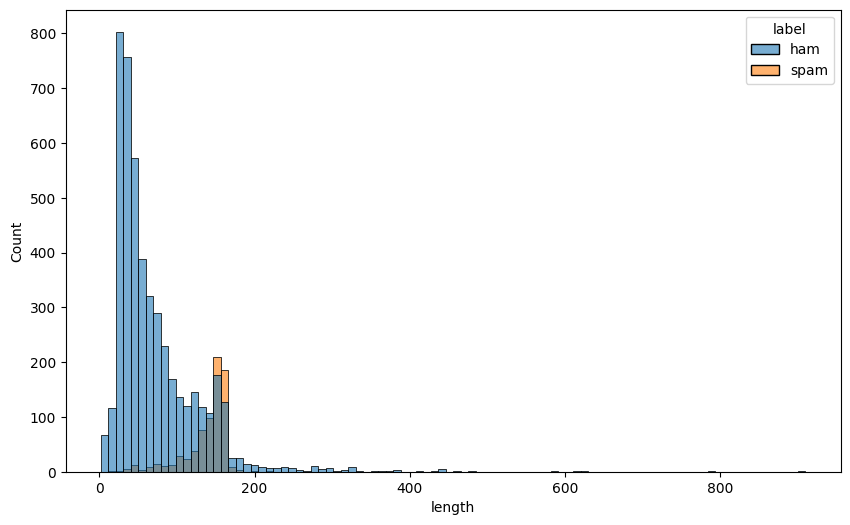

In [231]:
plt.figure(figsize=(10,6))
sns.histplot(hue='label',x='length',data=messages,alpha=.6)

In [235]:
import string
from nltk.corpus import stopwords

In [236]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [239]:
clean_mess=[word for word in sample.split() if word.lower() not in stopwords.words('english')]

In [240]:
clean_mess

['sample', 'message:', 'punc.']

In [174]:
def text_process(mess):
    nopunc=[c for c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [257]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [242]:
# messages['message']=messages['message'].apply(text_process)

In [258]:
messages.head() #further preprocessing can be done using stemming which converts forms of the smae word like ran run running

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [244]:
from sklearn.feature_extraction.text import CountVectorizer #step 1

In [259]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [260]:
len(bow_transformer.vocabulary_)

11425

In [261]:
mess4=messages['message'][3]


In [262]:
mess4

'U dun say so early hor... U c already then say...'

In [264]:
bow4=bow_transformer.transform([mess4])

In [266]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [269]:
print(bow4.shape) #row , cols , 11425 are the unique words we got

(1, 11425)


In [271]:
bow_transformer.get_feature_names_out()[11424]

'…Thanks'

In [276]:
message_bow=bow_transformer.transform(messages['message'])

In [287]:
message_bow # is a sparse matrix

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [277]:
print('Shape of sparse matrix : ', message_bow.shape)

Shape of sparse matrix :  (5572, 11425)


In [278]:
message_bow.nnz #no. of non zero occurances

50548

In [285]:
sparsity=(100*message_bow.nnz)/(message_bow.shape[0]*message_bow.shape[1])
print(f" Sparsity is  {sparsity}",) #sparsity is no. of non-zero elements in matrix/total no of elements

 Sparsity is  0.07940295412668218


In [ ]:
#TFIDF to get weights and normalisation

In [286]:
from sklearn.feature_extraction.text import TfidfTransformer

In [326]:
tfidf_transformer=TfidfTransformer().fit(message_bow)
tfidf_transformer

TfidfTransformer()

In [292]:
tfidf4=tfidf_transformer.transform(bow4)

In [294]:
print(tfidf4) # each represents weights for these words 

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [297]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['U']]

3.966206571809915

In [328]:
messages_tfidf=tfidf_transformer.transform(message_bow)
messages_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [301]:
from sklearn.naive_bayes import MultinomialNB

In [327]:
messages_tfidf.shape

(5572, 11425)

In [302]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [304]:
spam_detect_model.predict(tfidf4)[0] # this is given predictions on the tfidf4 message

'ham'

In [305]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [306]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
#now we can apply it to train and test data separately

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [317]:
msg_train

3587    I am hot n horny and willing I live local to y...
547     I know but you need to get hotel now. I just g...
3861               Yep. I do like the pink furniture tho.
1546    Good afternoon, my love ! Any job prospects ? ...
3221    Its like that hotel dusk game i think. You sol...
                              ...                        
2130           Mine here like all fr china then so noisy.
1574    SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
3104    U so lousy, run already come back then half de...
3325    I don wake since. I checked that stuff and saw...
5196    Spook up your mob with a Halloween collection ...
Name: message, Length: 3900, dtype: object

In [ ]:
 #to fit this to the training data, we need to complete all the steps from count vectorizer to normalisation

In [ ]:
# Instead we can use the sklearn pipelining feature to reduce redundancy of the commmon process

In [318]:
from sklearn.pipeline import Pipeline

In [320]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [321]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x28d49d280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [324]:
predictions=pipeline.predict(msg_test)

In [323]:
 from sklearn.metrics import classification_report,confusion_matrix

In [2]:
pd.DataFrame(classification_report(label_test,predictions,output_dict=True)).transpose

NameError: name 'pd' is not defined